In [8]:
import tensorflow as tf

In [9]:
mnist = tf.keras.datasets.mnist
#load dataset, tulisan tangan digit dari 0 sampai 9 (mnist namanya)
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [10]:
x_train[12]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  12,  99,  91, 142, 155, 246, 182, 155, 155, 155,
        155, 131,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

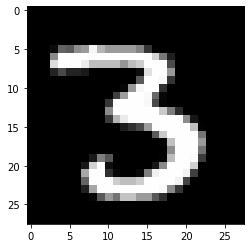

In [11]:
#wkwkkw yaudah kita gambar aja kali ya
import matplotlib.pyplot as plt

contoh=plt.imshow(x_train[12],cmap='gray')
#makin putih makin 255 makin hitam makin 0

In [12]:
#data kita reshape dulu, biar gampang komputer cerna nya

x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train/255.0
x_test=x_test/255.0

In [13]:
# Parameters 
learning_rate = 0.001 
training_epochs = 20 
batch_size = 100 
display_step = 1 


In [14]:
# Network Parameters 
n_hidden_1 = 256 

In [15]:
# 1st layer num features
n_hidden_2 = 256 # 2nd layer num features 
n_input = 784 # MNIST data input (img shape: 28*28) 
n_classes = 10 
# MNIST total classes (0-9 digits) 

In [17]:
# tf Graph input 
x = tf.TensorArray("float", [None, n_input]) 
y = tf.TensorArray("float", [None, n_classes]) 

TypeError: 'list' object cannot be interpreted as an integer

In [ ]:
# weights layer 1 
h = tf.Variable(tf.random_normal([n_input, n_hidden_1])) # bias layer 1 
bias_layer_1 = tf.Variable(tf.random_normal([n_hidden_1])) 
# layer 1 
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, h), bias_layer_1)) 


In [ ]:
# weights layer 2 
w = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])) 

In [ ]:
# bias layer 2 
bias_layer_2 = tf.Variable(tf.random_normal([n_hidden_2])) 

In [ ]:
# layer 2 
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, w), bias_layer_2)) 

In [ ]:
# weights output layer 
output = tf.Variable(tf.random_normal([n_hidden_2, n_classes])) 

In [ ]:
# biar output layer 
bias_output = tf.Variable(tf.random_normal([n_classes])) 
# output layer 
output_layer = tf.matmul(layer_2, output) + bias_output


In [ ]:
# cost function 
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
   logits = output_layer, labels = y)) 

In [ ]:
#cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(output_layer, y)) 
# optimizer 
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost) 
# optimizer = tf.train.GradientDescentOptimizer(
#   learning_rate = learning_rate).minimize(cost) 

In [ ]:
# Plot settings 
avg_set = [] 
epoch_set = [] 

In [ ]:
# Launch the graph 
with tf.Session() as sess: 
   sess.run(init) 
   
   # Training cycle
   for epoch in range(training_epochs): 
      avg_cost = 0. 
      total_batch = int(mnist.train.num_examples / batch_size) 
      
      # Loop over all batches 
      for i in range(total_batch): 
         batch_xs, batch_ys = mnist.train.next_batch(batch_size) 
         # Fit training using batch data 
         sess.run(optimizer, feed_dict = {x: batch_xs, y: batch_ys}) 
         # Compute average loss 
         avg_cost += sess.run(cost, feed_dict = {x: batch_xs, y: batch_ys}) / total_batch
      # Display logs per epoch step 
      if epoch % display_step == 0: 
         print("Epoch:", '%04d' % (epoch + 1), "cost=", "{:.9f}".format(avg_cost))
      avg_set.append(avg_cost) 
      epoch_set.append(epoch + 1)
   print("Training phase finished" )

   plt.plot(epoch_set, avg_set, 'o', label = 'MLP Training phase') 
   plt.ylabel('cost') 
   plt.xlabel('epoch') 
   plt.legend() 
   plt.show() 
   correct_prediction = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1)) 
   accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float")) 
   print("Model Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))